# Action Plan

- Download the data
    - Place the dataset in data/stroke folder !!! (dont forget to do this)
    - Load the data into a pandas dataframe?
- Preprocess the signals
    - Remove the noise
    - Normalize the data
- Feature extraction
    - Extract features from the signals
- Train the model
    - Train the model using the extracted features
- Evaluate the model
    - Evaluate the model using the test data


# Data Loading
- Load the data into a pandas dataframe from matlab file

In [1]:
# Load the data loadmat
from scipy.io import loadmat

# Load the data
data_dict = {
    "Patient_1" : {
        "Pre":{
            "Train": loadmat('data/stroke/P1_pre_training.mat'),
            "Test": loadmat('data/stroke/P1_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P1_post_training.mat'),
            "Test": loadmat('data/stroke/P1_post_test.mat')
        }
    },
    "Patient_2" : {
        "Pre":{
            "Train": loadmat('data/stroke/P2_pre_training.mat'),
            "Test": loadmat('data/stroke/P2_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P2_post_training.mat'),
            "Test": loadmat('data/stroke/P2_post_test.mat')
        }
    },
    "Patient_3" : {
        "Pre":{
            "Train": loadmat('data/stroke/P3_pre_training.mat'),
            "Test": loadmat('data/stroke/P3_pre_test.mat')
        },
        "Post":{
            "Train": loadmat('data/stroke/P3_post_training.mat'),
            "Test": loadmat('data/stroke/P3_post_test.mat')
        }
    },
}



# Preprocessing


In [2]:
# Trying to know the content of the data



print(data_dict["Patient_1"]["Pre"]["Train"].keys())
'''fs - sampling rate Hz
y - EEG data (n_channels x n_samples)
trig - trigger data (+1 left hand MI , -1 right hand MI)
'''

print("F sampling rate:")
print(data_dict["Patient_1"]["Pre"]["Train"]["fs"])
print("EEG data shape (samples, channels):")
print(data_dict["Patient_1"]["Pre"]["Train"]["y"].shape)
print("Trigger data shape:")
print(data_dict["Patient_1"]["Pre"]["Train"]["trig"].shape)


'''Separate epochs for left and right hand MI'''
from load_mne import load_mne

data = load_mne(data_dict["Patient_1"]["Pre"]["Train"]["y"], data_dict["Patient_1"]["Pre"]["Train"]["fs"], data_dict["Patient_1"]["Pre"]["Train"]["trig"])

# divide the eeg into epochs, each epoch is 8 seconds long (trigger is at 2 seconds, at 3.5 seconds )
# One session was composed by 240 MI repetitions on both hands, divided in 3 runs of 80 trials each.



dict_keys(['__header__', '__version__', '__globals__', 'fs', 'trig', 'y'])
F sampling rate:
[[256]]
EEG data shape (samples, channels):
(271816, 16)
Trigger data shape:
(271816, 1)


ImportError: cannot import name 'load_mne' from 'load_mne' (/Users/mohamed/Documents/GitHub/stroke-rehab-data-analysis/load_mne.py)

(271816, 16)


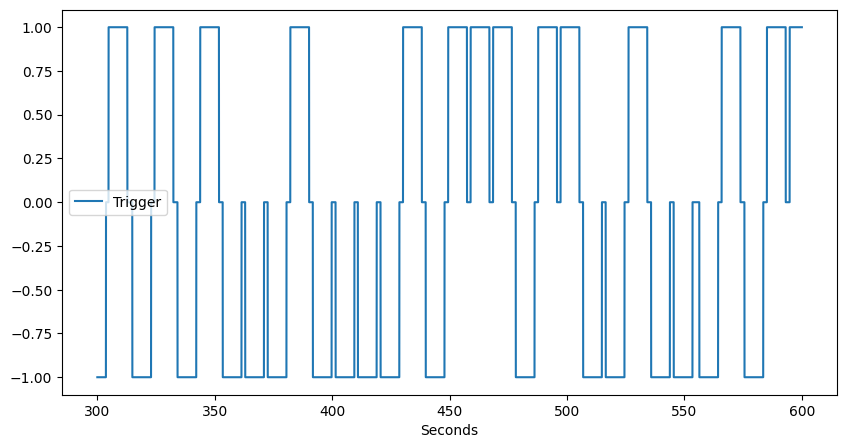

In [34]:
import numpy as np
# plot eeg and triggers for the first 10000 samples
import matplotlib.pyplot as plt

eeg_trigs = data_dict["Patient_1"]["Pre"]["Train"]["trig"][0, :]
out_trigs = np.zeros_like(eeg_trigs)
# find the triggers
idx_array = []
for i in range(len(eeg_trigs)):
    if (eeg_trigs[i] != eeg_trigs[i-1]):
        out_trigs.append(eeg_trigs[i])
        idx_array.append(i)

    
plt.figure(figsize=(10, 5))
start_samples = 256 * 60 * 5
end_samples = 256 * 60 * 5 + start_samples
data = data_dict["Patient_1"]["Pre"]["Train"]["y"]
triggers = data_dict["Patient_1"]["Pre"]["Train"]["trig"]

print(data.shape)
time_axis = np.arange(start_samples, end_samples) / data_dict["Patient_1"]["Pre"]["Train"]["fs"][0][0]
# plt.plot(time_axis, data[start_samples:end_samples, 0], label='Channel 1')
# plt.plot(time_axis, data[start_samples:end_samples, 1], label='Channel 2')
plt.plot(time_axis, triggers[start_samples:end_samples], label='Trigger')

plt.xlabel('Seconds')
plt.legend()

plt.show()

# Data Loading
- Load the data into a pandas dataframe from matlab file

# Preprocessing
